In [1]:
LANGUAGE = "it" # "de" or "it"
DEBIAS_ALGORITHM = "gkg" # "gkg" or "sc"

In [2]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path="./.env")

BASE_DIR = os.getenv("BASE_DIR")
NON_DEBIASED_DIR = os.getenv("NON_DEBIASED_DIR")
DEBIASED_DIR = os.getenv("DEBIASED_DIR")

NON_DEBIASED_PATH = f"{NON_DEBIASED_DIR}/{LANGUAGE}"
DEBIASED_PATH = f"{DEBIASED_DIR}/{DEBIAS_ALGORITHM}/{LANGUAGE}"

In [3]:
import codecs
import io
import numpy as np
from numpy import linalg as LA

def load_embeddings_and_vocab(filename):
    embeddings = np.load(filename + '.npy')
    with codecs.open(filename + '.vocab', 'r', 'utf-8') as f_embed:
        vocab = f_embed.read().split()

    word2id = {w: i for i, w in enumerate(vocab)}
    id2word = {v: k for k, v in word2id.items()}

    return vocab, embeddings, word2id, id2word

def normalize(embeddings):
    # normalize vectors
    norms = np.apply_along_axis(LA.norm, 1, embeddings)
    embeddings = embeddings / norms[:, np.newaxis]
    return embeddings

def load_and_normalize(filename):
    vocab, embeddings, word2id, id2word = load_embeddings_and_vocab(filename)
    embeddings = normalize(embeddings)
    return vocab, embeddings, word2id, id2word

def load_embeddings_and_normalize(filename):
    embeddings = np.load(filename + '.npy')
    embeddings = normalize(embeddings)
    return embeddings

def save_embeddings(filename, vocab, embeddings):
    np.save(filename + '.npy', embeddings)
    with codecs.open(filename + '.vocab', 'w', 'utf-8') as f_embed:
        for w in vocab:
            f_embed.write(w + '\n')

In [4]:
vocab, non_debiased_embeddings, my_word2id, my_id2word = load_and_normalize(NON_DEBIASED_PATH)
debiased_embeddings = load_embeddings_and_normalize(DEBIASED_PATH)

assert len(vocab) == len(non_debiased_embeddings) == len(my_word2id) == len(my_id2word)
assert len(vocab) == len(set(vocab))

In [5]:
if LANGUAGE == "de":

# German
    num_iter = 19
    
    masc = ['zorn', 'streit', 'rand', 'vertrag', 'tod', 'globus', 'auftrag', 'winter'] # 'widersacher' is taken out, because the same meaning as 'gegener'
    fem =  ['wut', 'auseinandersetzung', 'grenze', 'vereinbarung', 'tragödie', 'welt', 'aufgabe', 'jahreszeit'] # 'gegener' is taken out
    man = ['mann', 'junge', 'vater', 'männlich', 'großvater', 'ehemann', 'sohn', 'onkel']
    wom = ['mädchen', 'weiblich', 'tante', 'tochter', 'ehefrau', 'frau', 'mutter', 'großmutter']

    sci = ['astronomie', 'mathematik', 'chemie', 'physik', 'biologie', 'geologie', 'ingenieurswissenschaften', 'statistik', 'biophysik', 'biochemie', 'ökologie', 'mikrobiologie', 'algebra', 'geometrie', 'telekommunikation', 'computer', 'astrophysik', 'informatik'] # 'informatik' instead of 'bioingenieurwesen'
    hum = ['philosophie', 'kunst', 'geschichte', 'musik', 'geisteswissenschaften', 'psychologie', 'soziologie', 'geographie', 'anthropologie', 'theologie', 'linguistik', 'journalismus', 'archäologie', 'tanz', 'zeichnung', 'malerei', 'sprachwissenschaften', 'literaturwissenschaften']
    
    car =  ['verwaltung', 'berufstätigkeit', 'unternehmen', 'gehalt', 'büro', 'karriere', 'geschäft', 'management']
    fam = ['haus', 'eltern', 'kinder', 'familie', 'hochzeit', 'ehe', 'verwandte', 'cousins']

    boy = ['johannes', 'lukas', 'daniel', 'paul', 'thomas', 'benjamin', 'felix', 'christopher', 'maximilian']
    girl = ['julia', 'michaela', 'anna', 'laura', 'sofie', 'sarah', 'lisa', 'jessica', 'sabrina']

    flo = ['orchidee', 'rose', 'narzisse', 'flieder', 'tulpe', 'gänseblümchen', 'lilie', 'veilchen', 'magnolie']
    ins = ['ameise', 'floh', 'spinne', 'wanze', 'fliege', 'tarantel', 'biene', 'kakerlake', 'mücke']

    instr = ['cello', 'gitarre', 'laute', 'posaune', 'banjo', 'klarinette', 'mundharmonika', 'mandoline', 'trompete', 'fagott', 'trommel', 'harfe', 'glocke', 'geige', 'cembalo', 'klavier', 'bratsche', 'flöte', 'horn', 'saxophon', 'violine']
    wep =  ['keule', 'waffe', 'rakete', 'speer', 'axt', 'dolch', 'harpune', 'pistole', 'dynamit', 'beil', 'gewehr', 'panzer', 'bombe', 'schusswaffe', 'messer', 'schrotflinte', 'tränengas', 'kanone', 'granate', 'schleuder', 'peitsche']

    plez = ['freiheit', 'gesundheit', 'liebe', 'frieden', 'jubel', 'freund', 'himmel', 'treue', 'vergnügen', 'diamant', 'sanft', 'ehrlich', 'regenbogen', 'diplom', 'geschenk', 'ehre', 'wunder', 'sonnenaufgang', 'familie', 'glücklich', 'lachen', 'paradies', 'sonne'] # 'sonne' instead of 'liebkosung'
    unplez = ['missbrauch', 'absturz', 'schmutz', 'mord', 'krankheit', 'unfall', 'tod', 'trauer', 'gift', 'gestank', 'angriff', 'katastrophe', 'hass', 'umweltverschmutzung', 'tragödie', 'scheidung', 'gefängnis', 'armut', 'hässlich', 'krebs', 'töten', 'faul', 'erbrechen']

elif LANGUAGE == "it":
    
    num_iter = 20
    
    # Italian
    masc = ['confine','lido','appartamento','paio','vagone','carbone','viaggio','addome','dolore']
    fem = ['frontiera','spiaggia','casa','coppia','carrozza','carbonella','gita','pancia','agonia']
    man = ['uomo', 'padre', 'maschio', 'nonno', 'marito', 'zio', 'figlio','ragazzo']
    wom = ['femmina', 'zia', 'moglie', 'donna', 'madre', 'nonna', 'ragazza','figlia']

    sci = ["astronomia", "matematica", "chimica", "fisica", "biologia", "geologia", "ingegneria", "statistica", "bioingegneria", "biofisica", "biochimica", "ecologia", "microbiologia","algebra","geometria","telecomunicazioni","computer","astrofisica"]
    hum = ['filosofia', 'umanesimo', 'arte', 'letteratura', 'italiano', 'musica', 'storia', "psicologia", "sociologia", "geografia", "antropologia", "teologia", "linguistica", "giornalismo", "archeologia", "danza", "disegno", "pittura"]


    car = ['carriera', 'azienda', 'stipendio', 'ufficio', 'esperto', 'gestione','affari', 'dirigente']
    fam = ['matrimonio', 'nozze', 'genitori', 'parenti', 'famiglia', 'casa', 'figli', 'cugini']

    boy = ['marco', 'alessandro', 'giuseppe', 'giovanni', 'roberto', 'stefano', 'francesco', 'mario', 'luigi'] 
    girl = ['anna', 'maria', 'sara', 'laura', 'giulia', 'rosa','angela', 'sofia', 'stella']

    flo = ['orchidea', 'rosa', 'narciso', 'lilla', 'tulipano', 'margherita', 'giglio', 'viola', 'magnolia']
    ins = ['pulce', 'ragno', 'cimice', 'mosca', 'tarantola', 'ape', 'scarafaggio', 'zanzara', 'calabrone']

    instr = ['trombone', 'banjo', 'clarinetto', 'armonica', 'mandolino', 'tromba', 'fagotto', 'tamburo', 'arpa', 'oboe', 'tuba', 'campana', 'violino', 'clavicembalo', 'pianoforte', 'viola', 'bongo', 'flauto', 'corno', 'sassofono', 'violino']
    wep = ['ascia', 'bastone', 'lancia', 'lancia', 'fucile', 'lancia', 'lancia', 'lancia', 'missile', 'pugnale', 'pistola', 'dinamite', 'spada', 'serbatoio', 'bomba', 'pistola', 'cannone', 'granata', 'mazza', 'fionda', 'frusta']

    plez = ['libertà', 'salute', 'amore', 'pace', 'allegria', 'amico', 'cielo', 'leale', 'piacere', 'diamante', 'gentile', 'onesto', 'fortunato', 'arcobaleno', 'diploma', 'dono', 'onore', 'miracolo', 'alba', 'famiglia', 'felice', 'risate', 'paradiso']
    unplez = ['abuso', 'crash', 'sporcizia', 'omicidio', 'malattia', 'incidente', 'morte', 'dolore', 'veleno',
    'assalto', 'disastro', 'odio', 'inquinare', 'tragedia', 'divorzio', 'carcere', 'povertà', 'brutto', 'cancro', 'uccidere', 'marcio','vomito', 'agonia']

elif LANGUAGE == "en":

#English

    man = ["man", "son", "father", "boy", "uncle", "grandpa", "husband", "male"]
    wom = ["mother", "wife", "aunt", "woman", "girl", "female", "grandma", "daughter"]

    sci = ["astronomy", "math", "chemistry", "physics", "biology", "geology", "engineering", "statistics", "bioengineering", "biophysics", "biochemistry", "ecology", "microbiology", "algebra", "geometry","telecommunications", "computer", "astrophysics"]
    hum = ["history", "arts", "humanities", "english", "philosophy", "music", "literature", "psychology", "sociology", "geography", "anthropology", "theology", "linguistics", "journalism","archaeology","dancing","drawing", "painting"]

    car = ['career', 'corporation', 'salary', 'office', 'professional', 'management', 'business', 'executive'] 
    fam = ['wedding', 'marriage', 'parents', 'relatives', 'family', 'home', 'children', 'cousins']
    
    boy = ['Ben', 'Paul', 'Daniel', 'John', 'Jeffrey', 'Mike','Kevin','Steve','Greg']
    girl = ['Rebecca', 'Michelle', 'Emily', 'Julia', 'Anna','Amy','Lisa','Sarah','Kate']

    flo = ['clover', 'orchid', 'rose','lilac', 'tulip', 'daisy', 'lily', 'violet', 'magnolia']
    ins = ['ant', 'flea', 'spider','fly', 'tarantula', 'bee', 'cockroach', 'mosquito', 'hornet']

    instr = ['guitar', 'lute', 'trombone', 'banjo', 'clarinet', 'harmonica', 'mandolin', 'trumpet',
                      'bassoon', 'drum','harp','bell', 'fiddle', 'harpsichord', 'piano', 'viola', 'bongo', 'flute',
                      'horn', 'saxophone', 'violin']
    wep =['arrow', 'club', 'gun', 'missile', 'spear', 'axe', 'dagger', 'harpoon', 'pistol', 'sword','dynamite',
                      'rifle','tank', 'bomb', 'firearm', 'knife', 'teargas', 'cannon', 'grenade','slingshot', 'whip']

    plez  = ['freedom', 'health', 'love', 'peace', 'cheer', 'friend', 'heaven', 'loyal', 'pleasure', 'diamond',
                     'gentle', 'honest','lucky', 'rainbow', 'diploma', 'gift', 'honor', 'miracle','family', 'happy', 'laughter',
                     'paradise', 'vacation']
    unplez = ['abuse','filth' , 'murder' , 'sickness' ,'death', 'grief', 'poison', 'stink', 'assault',
                      'disaster', 'hatred','pollute', 'tragedy', 'divorce', 'jail', 'poverty', 'ugly', 'cancer', 'kill', 'rotten',
                      'vomit', 'agony', 'prison']

___

# WEAT

In [6]:
from utils import operations

def perform_weat(target1, target2, attribute1, attribute2, embeddings, my_word2id):
    
    myOperations = operations(10000,embeddings, my_word2id,'normal',attribute1,attribute2,target1,target2)
    results = myOperations.perform_weat()
    return results

In [7]:
import pandas as pd

weat_results = pd.DataFrame(columns=['d (non)', 'd (debiased)', 'p (non)', 'p (debiased)'])

In [8]:
# baseline WEAT
print('\nBaseline WEAT')
print('flo-ins')
print('non-debiased')
non_debiased = perform_weat(flo, ins, plez, unplez, non_debiased_embeddings, my_word2id)
print('debiased')
debiased = perform_weat(flo, ins, plez, unplez, debiased_embeddings, my_word2id)
weat_results.loc['flo-ins'] = [non_debiased[1], debiased[1], non_debiased[0], debiased[0]]

print('instr-wep')
print('non-debiased')
non_debiased = perform_weat(instr, wep, plez, unplez, non_debiased_embeddings, my_word2id)
print('debiased')
debiased = perform_weat(instr, wep, plez, unplez, debiased_embeddings, my_word2id)
weat_results.loc['instr-wep'] = [non_debiased[1], debiased[1], non_debiased[0], debiased[0]]

# gg-weat
print('\nGG WEAT')
print('non-debiased')
non_debiased = perform_weat(masc, fem, man, wom, non_debiased_embeddings, my_word2id)
print('debiased')
debiased = perform_weat(masc, fem, man, wom, debiased_embeddings, my_word2id)
weat_results.loc['GG'] = [non_debiased[1], debiased[1], non_debiased[0], debiased[0]]

# genS
print('\nGenS')
print('non-debiased')
non_debiased = perform_weat(sci, hum, man, wom, non_debiased_embeddings, my_word2id)
print('debiased')
debiased = perform_weat(sci, hum, man, wom, debiased_embeddings, my_word2id)
weat_results.loc['GenS'] = [non_debiased[1], debiased[1], non_debiased[0], debiased[0]]

# genC
print('\nGenC')
non_debiased = perform_weat(car, fam, boy, girl, non_debiased_embeddings, my_word2id)
print('debiased')
debiased = perform_weat(car, fam, boy, girl, debiased_embeddings, my_word2id)
weat_results.loc['GenC'] = [non_debiased[1], debiased[1], non_debiased[0], debiased[0]]


Baseline WEAT
flo-ins
non-debiased
The difference of means is  0.05192457067801044
Generating null distribution...
Number of permutations  10000
Getting the entire distribution
p-value:  0.00039284608820222555   ---  effectSize:  1.5906179166845718
debiased
The difference of means is  0.059688082998729915
Generating null distribution...
Number of permutations  10000
Getting the entire distribution
p-value:  0.00017268733264452774   ---  effectSize:  1.6767563544733384
instr-wep
non-debiased
The difference of means is  0.03348056456133139
Generating null distribution...
Number of permutations  10000
Getting the entire distribution
p-value:  0.0004653550684665664   ---  effectSize:  1.0183064925176402
debiased
The difference of means is  0.04859367834639291
Generating null distribution...
Number of permutations  10000
Getting the entire distribution
p-value:  1.663308866928226e-05   ---  effectSize:  1.2879398219890186

GG WEAT
non-debiased
The difference of means is  0.1109556925623913

In [9]:
print('\nWEAT results')
print(weat_results)

# print values like latex table
print('\nWEAT results (latex)')
print(weat_results.to_latex())


WEAT results
            d (non)  d (debiased)   p (non)  p (debiased)
flo-ins    1.590618      1.676756  0.000393      0.000173
instr-wep  1.018306      1.287940  0.000465      0.000017
GG         1.787275      0.800298  0.000081      0.045159
GenS      -0.435571     -0.270432  0.904598      0.796003
GenC       1.228375      1.356779  0.006799      0.003161

WEAT results (latex)
\begin{tabular}{lrrrr}
\toprule
 & d (non) & d (debiased) & p (non) & p (debiased) \\
\midrule
flo-ins & 1.590618 & 1.676756 & 0.000393 & 0.000173 \\
instr-wep & 1.018306 & 1.287940 & 0.000465 & 0.000017 \\
GG & 1.787275 & 0.800298 & 0.000081 & 0.045159 \\
GenS & -0.435571 & -0.270432 & 0.904598 & 0.796003 \\
GenC & 1.228375 & 1.356779 & 0.006799 & 0.003161 \\
\bottomrule
\end{tabular}



---

# Pairwise distance (cosine similarity)
Gonen et al's Grammatical Gender Neutralization Metric

In [10]:
gonen_results = pd.DataFrame(columns=['cos_sim (non)', 'cos_sim (debiased)'])

In [11]:
from numpy import dot
from numpy.linalg import norm as norm1

def cos_sim(emb1, emb2):
    # return((emb1/np.linalg.norm(emb1)).dot(emb2/np.linalg.norm(emb2)))
    return dot(emb1, emb2)/(norm1(emb1)*norm1(emb2))

#function for reading simlex-999 noun pairs
def read_data(file_name):
    nouns_1 = []
    nouns_2 = []
    with io.open(file_name, "r") as f:
        for line in f:
            words = line[:-1].split(',')
            nouns_1.append(words[0])
            nouns_2.append(words[1])
    return nouns_1, nouns_2

#function for computing the avg cosine similarity among nouns with the same gender and nouns with 
#differing gender
def avg_sim(nouns_1, nouns_2, my_embeddings):
    cos_sim_list = []
    avg = 0
    count = 0
    for i in range(len(nouns_1)):
        w1 = nouns_1[i]
        w2 = nouns_2[i]
        w1_upp = w1[0].upper()+w1[1:]
        w2_upp = w2[0].upper()+w2[1:]
        #check if the words (in lower or uppercase) are in the embedding dictionary
        cond1 = w1 in my_word2id or w1_upp in my_word2id 
        cond2 = w2 in my_word2id or w2_upp in my_word2id 
        
        if cond1 and cond2:
            count += 1
            if w1 in my_word2id:
                emb1 = my_embeddings[my_word2id[w1]]
            else:
                emb1 = my_embeddings[my_word2id[w1_upp]]
            if w2 in my_word2id:
                emb2 = my_embeddings[my_word2id[w2]]
            else:
                emb2 = my_embeddings[my_word2id[w2_upp]]
            
            sim = cos_sim(emb1, emb2)
            cos_sim_list.append(sim)
            avg += sim
        else:
            print("not found ", i)
    print("number of word pairs used in gonen analysis", count)
    return (avg/count), cos_sim_list
    

Loading one file which contains pairs of nouns with the same gender, and another file where the pairs of nouns have differring genders

In [12]:
print('\nGonen same gender')
pth1 = "data/nouns/gonen-test/"+LANGUAGE+"-same.txt"
nouns_3, nouns_4 = read_data(pth1)
print('non-debiased')
non_debiased, non_debiased_same_list = avg_sim(nouns_3, nouns_4, non_debiased_embeddings)
print('debiased')
debiased, debiased_same_list = avg_sim(nouns_3, nouns_4, debiased_embeddings)
gonen_results.loc['same gender'] = [non_debiased, debiased]

print('\nGonen different gender')
pth1 = "data/nouns/gonen-test/"+LANGUAGE+"-diff.txt"
nouns_3, nouns_4 = read_data(pth1)
print('non-debiased')
non_debiased, non_debiased_diff_list = avg_sim(nouns_3, nouns_4, non_debiased_embeddings)
print('debiased')
debiased, debiased_diff_list = avg_sim(nouns_3, nouns_4, debiased_embeddings)
gonen_results.loc['diff gender'] = [non_debiased, debiased]

print('\nGonen results')
print(gonen_results)


Gonen same gender
non-debiased
number of word pairs used in gonen analysis 203
debiased
number of word pairs used in gonen analysis 203

Gonen different gender
non-debiased
not found  12
not found  83
not found  90
not found  102
not found  118
not found  183
not found  210
not found  222
number of word pairs used in gonen analysis 318
debiased
not found  12
not found  83
not found  90
not found  102
not found  118
not found  183
not found  210
not found  222
number of word pairs used in gonen analysis 318

Gonen results
             cos_sim (non)  cos_sim (debiased)
same gender       0.424858            0.419575
diff gender       0.403182            0.432744


In [13]:
# shapiro-wilk test for normality
from scipy.stats import shapiro, ttest_ind, wilcoxon

print('\nShapiro-Wilk test for normality')
print('same')
print(shapiro(non_debiased_same_list))
print(shapiro(debiased_same_list))
print('diff')
print(shapiro(non_debiased_diff_list))
print(shapiro(debiased_diff_list))

# If p-value > 0.05, then we can assume that the data is normally distributed and we can use the t-test
# Null hypothesis: the mean difference between the paired samples is zero (no effect).
print('\nt-test for difference of means')
print(ttest_ind(non_debiased_same_list, debiased_same_list))
print(ttest_ind(non_debiased_diff_list, debiased_diff_list))

# If p-value < 0.05, then we can assume that the data is not normally distributed and we can use wilcoxon test
# Null hypothesis: the median of the differences between the pairs is zero (no effect).
print('\nWilcoxon test for difference of means')
print(wilcoxon(non_debiased_same_list, debiased_same_list))
print(wilcoxon(non_debiased_diff_list, debiased_diff_list))


Shapiro-Wilk test for normality
same
ShapiroResult(statistic=0.9899847507476807, pvalue=0.16992799937725067)
ShapiroResult(statistic=0.989215075969696, pvalue=0.13030897080898285)
diff
ShapiroResult(statistic=0.9896354079246521, pvalue=0.023495791479945183)
ShapiroResult(statistic=0.9929676055908203, pvalue=0.14154891669750214)

t-test for difference of means
Ttest_indResult(statistic=0.3466302722893944, pvalue=0.7290495696504107)
Ttest_indResult(statistic=-2.4080496859970855, pvalue=0.01632246797432436)

Wilcoxon test for difference of means
WilcoxonResult(statistic=7396.0, pvalue=0.0004178373643872654)
WilcoxonResult(statistic=7155.0, pvalue=1.3257143227868966e-28)


___

Loading 5,000 inanimate grammatically feminine and masculine nouns. German is case-sensetive so special treatment.

In [14]:
expanded_m_nouns = []
expanded_f_nouns = []
count = 0
pth1 = "./data/nouns/"+LANGUAGE+"-masc-v2.txt"
with open(pth1, "r") as f:
    for line in f:
        word_raw = line.strip()
        word = word_raw[0].upper()+word_raw[1:]
        if word not in expanded_m_nouns or word_raw not in expanded_m_nouns:
            
            if "de" == LANGUAGE:
                if word in my_word2id.keys():
                    expanded_m_nouns.append(word)
                elif word_raw in my_word2id.keys():
                    expanded_m_nouns.append(word_raw)
            else:
                if word_raw in my_word2id.keys():
                    expanded_m_nouns.append(word_raw)
                

print("size of total masculine nouns")
print(len(expanded_m_nouns))

pth1 = "./data/nouns/"+LANGUAGE+"-fem-v2.txt"
with open(pth1, "r") as f:
    for line in f:
        word_raw = line.strip()
        word = word_raw[0].upper()+word_raw[1:]
        if word not in expanded_f_nouns or word_raw not in expanded_f_nouns:
            
            if "de" == LANGUAGE:
                if word in my_word2id.keys():
                    expanded_f_nouns.append(word)
                elif word_raw in my_word2id.keys():
                    expanded_f_nouns.append(word_raw)
            else:
                if word_raw in my_word2id.keys():
                    expanded_f_nouns.append(word_raw)

print("size of total feminine nouns")
print(len(expanded_f_nouns))

#pairing them for easier processing (not semantically paired)
grammar_pair_expanded = []
for f,m in zip(expanded_f_nouns, expanded_m_nouns):
    pair = [f,m]
    grammar_pair_expanded.append(pair)

print("size of masculine and feminine nouns (made equal)")
len(grammar_pair_expanded)

size of total masculine nouns
4488
size of total feminine nouns
3968
size of masculine and feminine nouns (made equal)


3968

In [15]:
from sklearn.preprocessing import normalize #machine learning algorithm library

# selecting 3,000 feminine and 3,000 masculine nouns for learning the grammatical gender subspace
shortened_3000 = grammar_pair_expanded[:3000]

#selecting another subset for testing.
rest = grammar_pair_expanded[3000:6000]
X_rest = np.zeros((len(rest)*2, 300))

counter = 0
for pair in rest:
    X_rest[counter] = non_debiased_embeddings[my_word2id[pair[0]]]
    counter += 1
    X_rest[counter] = non_debiased_embeddings[my_word2id[pair[1]]]
    counter += 1
    
#normalizing the embeddings
X_rest = normalize(X_rest,axis=0)
#creating gender labels
y_rest = np.tile([1,2],len(rest))

## SVC can predict grammatical gender with a high accuracy. Grammatical gender direction is the coefficients of the SVC.

In [16]:
from sklearn.svm import LinearSVC

X_3000 = np.zeros((6000, 300))

counter = 0
for pair in shortened_3000:
    X_3000[counter] = non_debiased_embeddings[my_word2id[pair[0]]]
    counter += 1
    X_3000[counter] = non_debiased_embeddings[my_word2id[pair[1]]]
    counter += 1
    

#normalizing the embeddings
X_3000=normalize(X_3000,axis=0)

#creating gender labels
y_3000 = np.tile([1,2],3000)


clf_3000 = LinearSVC(C = 10)
clf_3000.fit(X_3000, y_3000)
acc = clf_3000.score(X_3000,y_3000)
print("Initial classification accuracy is", acc)

acc1 = clf_3000.score(X_rest,y_rest)
print("test classification accuracy is", acc1)

#selecting the decision hyperplane as the grammatical gender signal
coef = clf_3000.coef_
grammar_gender_direction_3000 = np.reshape(coef/np.linalg.norm(coef), (300,))

gg = np.reshape(coef/np.linalg.norm(coef), (300,))

/home/viktorija/.pyenv/versions/3.8.18/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Initial classification accuracy is 0.9823333333333333
test classification accuracy is 0.9524793388429752


---

# Single- category GG-WEAT

In [17]:
attributesFirstSet = man
attributesSecondSet = wom

In [18]:
fem_n = []
masc_n = []
counter = 0

#obtaining the first 1,000 inanimate nouns for single category gg-weat
for pair in shortened_3000:
    
    fem_n.append(pair[0])
    masc_n.append(pair[1])
    
    counter += 1
    if counter == 1000:
        break

def write_sc_weat_results(myFileName, d_before, d_after):
    f = open(myFileName, "w+")
    for i in range(len(d_before)):
        f.write(str(d_before[i])+ "\t" + str(d_after[i]) + "\n")
    f.close()
    
    
from statistics import mean

from utils import operations

single-category gg-weat for masculine inanimate nouns

In [19]:
def compare_gg_weat(target1, attribute1, attribute2, embeddings_before, embeddings_after, word2id):
    
    ## gg-weat before disentangling grammatical gender
    myOperations_1 = operations(10,embeddings_before, word2id,'normal',attribute1,attribute2,target1)
    d_list_before, p_list_before = myOperations_1.perform_sc_weat()
    
    ## gg-weat after disentangling grammatical gender
    myOperations_2 = operations(10,embeddings_after, word2id,'normal',attribute1,attribute2,target1)
    d_list_after, p_list_after = myOperations_2.perform_sc_weat()
    
    for elem in zip(target1, d_list_before, d_list_after, p_list_before,p_list_after):
        print("Single Category GG WEAT for    "+ elem[0])
        print("Gender: Masc")
        print("effect size:     before: "+ str(elem[1])+ "     after: "+str(elem[2]))
        print("p value:     before: "+ str(elem[3])+ "     after: "+str(elem[4]))
        print("")
    return d_list_before, d_list_after

In [20]:
nouns = masc_n
d_list_before, d_list_after = compare_gg_weat(nouns, attributesFirstSet, attributesSecondSet, 
                                              non_debiased_embeddings, debiased_embeddings, my_word2id)

Single Category GG WEAT for    esseri
Gender: Masc
effect size:     before: 0.19444350646055597     after: 0.04713081518569425
p value:     before: 0.47718455405448057     after: 0.4775314700970562

Single Category GG WEAT for    motivo
Gender: Masc
effect size:     before: 1.3132176046281725     after: -0.03506760657869364
p value:     before: 0.003521109262441313     after: 0.6260216547092543

Single Category GG WEAT for    casi
Gender: Masc
effect size:     before: 0.056036590887085715     after: -0.3274666175315438
p value:     before: 0.39013051360548356     after: 0.8079018240189138

Single Category GG WEAT for    genere
Gender: Masc
effect size:     before: 0.865139006588268     after: 0.14253758003375988
p value:     before: 0.05667950340646877     after: 0.48988480812780455

Single Category GG WEAT for    neofascisti
Gender: Masc
effect size:     before: 0.22014142882073862     after: 0.5806296155468282
p value:     before: 0.43134225151614436     after: 0.1468728645065892

Si

In [21]:
def check_sc_weat(gender, d_before, d_after):
    correct = 0
    for i in range(len(d_after)):
        if gender == "fem":
            if d_before[i] < d_after[i]:
                correct += 1
        elif gender == "masc":
            if d_before[i] > d_after[i]:
                correct += 1
    acc = correct/len(d_after)    
    print("accuracy is ", correct ,"/", len(d_after), " or ", acc)
    
            
print("percentage of masculine nouns whose association with masculinity weakened after gg removal")                
check_sc_weat("masc", d_list_before, d_list_after)

percentage of masculine nouns whose association with masculinity weakened after gg removal
accuracy is  740 / 1000  or  0.74


In [22]:
sc_weat_masc_filename = f"results/sc_weat/{LANGUAGE}_{DEBIAS_ALGORITHM}_masc_{str(num_iter)}_iter.txt"
write_sc_weat_results(sc_weat_masc_filename, d_list_before, d_list_after)

In [23]:
print("average masculinity association of inannimate nouns before gg removal", mean(d_list_before))
print("average masculinity association of inannimate nouns after gg removal", mean(d_list_after))

average masculinity association of inannimate nouns before gg removal 0.5147798336637963
average masculinity association of inannimate nouns after gg removal 0.0875934853458692


In [24]:
nouns = fem_n
d_list_before, d_list_after = compare_gg_weat(nouns, attributesFirstSet, attributesSecondSet, 
                                              non_debiased_embeddings, debiased_embeddings, my_word2id)

Single Category GG WEAT for    pagina
Gender: Masc
effect size:     before: -1.3903885708621568     after: -0.652397523220028
p value:     before: 0.9952767517345817     after: 0.8942756131000971

Single Category GG WEAT for    cima
Gender: Masc
effect size:     before: -1.5726352100862568     after: -0.29185883204432217
p value:     before: 0.9997221691344911     after: 0.83402285081482

Single Category GG WEAT for    discesa
Gender: Masc
effect size:     before: -0.6355887163217064     after: 1.0167691749715977
p value:     before: 0.9009165764753682     after: 0.0029848422775570205

Single Category GG WEAT for    fatica
Gender: Masc
effect size:     before: -0.8245390939809335     after: -0.22181609808396108
p value:     before: 0.8854765375469056     after: 0.6322211543386915

Single Category GG WEAT for    qualità
Gender: Masc
effect size:     before: -1.1853171972382033     after: 0.5478987318251872
p value:     before: 0.9793084942564141     after: 0.1582013100547086

Single Cat

In [25]:
print("percentage of feminine nouns whose association with femininity weakened after gg removal") 
check_sc_weat("fem", d_list_before, d_list_after)

percentage of feminine nouns whose association with femininity weakened after gg removal
accuracy is  816 / 1000  or  0.816


In [26]:
sc_weat_fem_filename = f"results/sc_weat/{LANGUAGE}_{DEBIAS_ALGORITHM}_fem_{str(num_iter)}_iter.txt"
write_sc_weat_results(sc_weat_fem_filename, d_list_before, d_list_after)

In [27]:
print("average femnininty association of inannimate nouns before gg removal", mean(d_list_before))
print("average femnininty association of inannimate nouns after gg removal", mean(d_list_after))

average femnininty association of inannimate nouns before gg removal -0.617356168977169
average femnininty association of inannimate nouns after gg removal -0.09169423920579114


---

# Writing tsv files for Embedding Visualization in tensorflow projector

In [28]:
#generates a tsv file for visualizing embeddings
def generateTSVfile(myFileName, wv, word2index,word_list):
    f = open(myFileName, "w+")
    for word in word_list:
        row = wv[word2index[word]]
        for j in range(0, len(row) - 1):
            f.write("%f\t" % row[j])
        f.write("\n")
    f.close()
    
def generateLabelFile_words(labelFileName, word_list):
    f = open(labelFileName, "w+")
    for word in word_list:
        if word == '':
            word = 'NULL'

        f.write("%s\n" % word)
    f.close()

    print ("files written")
    
def generateLabelFile_color(labelFileName, word_list_1, word_list_2):
    f = open(labelFileName, "w+")
    for word in word_list_1:
        if word == '':
            word = 'NULL'

        f.write("1 \n")
    for word in word_list_1:
        if word == '':
            word = 'NULL'

        f.write("2 \n")
    f.close()

    print ("files written")

In [29]:
import ValNorm as valnorm
import calcValNorm as calcValNorm
import os

def prep_input(word2id, embedding):

    semanticModel = {}

    for word in word2id:
        semanticModel[word] = embedding[word2id[word]]

    return semanticModel

def read_vocab(file_name):
    f = open(file_name, "r")
    f.readline()
    my_list = []
    for line in f:
        words = line.split(",")
        my_list.append(words[1])

    f.close()
    return my_list

---

# ValNorm

In [30]:
val_file = "data/valnorm/my_" + LANGUAGE +".csv"
valnorm_word_list = read_vocab(val_file)
semanticModel = prep_input(my_word2id, non_debiased_embeddings)
WEFAT_results_1 = valnorm.WordEmbeddingFactualAssociationTestVocab(semanticModel,valnorm_word_list, LANGUAGE)
WEFAT_results_1.to_csv("valnorm.csv")

in bancarotta
capi di abbigliamento
coccolare
detesto
formazione scolastica
flaccido
la libertà
di bell'aspetto
mal di testa
succulento
i soldi
putrido
mal di mare
posto a sedere
femminuccia
mal di denti
san valentino


/home/viktorija/.pyenv/versions/3.8.18/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Valnorm before gender removal

In [31]:
calcValNorm.calculate_valNorm("valnorm.csv",val_file)
os.remove("valnorm.csv") 

368
368
Pearsons correlation for monolingual: 0.732


Valnorm after gender removal

In [32]:
semanticModel = prep_input(my_word2id, debiased_embeddings)
WEFAT_results_1 = valnorm.WordEmbeddingFactualAssociationTestVocab(semanticModel,valnorm_word_list, LANGUAGE)
WEFAT_results_1.to_csv("valnorm.csv")

calcValNorm.calculate_valNorm("valnorm.csv",val_file)
os.remove("valnorm.csv") 

in bancarotta
capi di abbigliamento
coccolare
detesto
formazione scolastica
flaccido
la libertà
di bell'aspetto
mal di testa
succulento
i soldi
putrido
mal di mare
posto a sedere
femminuccia
mal di denti
san valentino
368
368
Pearsons correlation for monolingual: 0.705


Removing grammatical gender from all words used in ValNorm

---

# Analogy Task

In [33]:
def solve_analogy(word_1, word_2, word_3, word_4, src_emb, src_id2word, word2id, K=10):
    
    if word_1 not in word2id:
        return "NULL"
    if word_2 not in word2id:
        return "NULL"
    if word_3 not in word2id:
        return "NULL"
    if word_4 not in word2id:
        return "NULL"
    
    emb1 = src_emb[word2id[word_1]]
    emb2 = src_emb[word2id[word_2]]
    emb3 = src_emb[word2id[word_3]]
    
    
    word_emb = (emb2 - emb1) + emb3
    scores = (src_emb/ np.linalg.norm(src_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    answer = ""
    for i, idx in enumerate(k_best):
#         print('%.4f - %s' % (scores[idx], src_id2word[idx]))
        if ((word_1.lower() not in src_id2word[idx].lower()) and ( word_2.lower() not in src_id2word[idx].lower())) and (word_3.lower() not in src_id2word[idx].lower()):
            answer = src_id2word[idx]
            break
    return answer
    
def read_test(file_name, my_embeddings, my_id2word, my_word2id):
    correct = 0
    in_vocab = 0
    not_in_vocab = 0
    wrong_index = []
    correct_index = []
    with io.open(file_name, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for i, line in enumerate(f):
            word_1, word_2, word_3, word_4 = line.rstrip().split(' ', 3)
            answer = solve_analogy(word_1, word_2, word_3, word_4, my_embeddings, my_id2word, my_word2id)
            print(i, word_1, word_2, word_3, word_4, answer)
            if answer == "NULL":
                not_in_vocab += 1
                wrong_index.append(i)
            else:
                in_vocab += 1
                if answer == word_4:
                    correct_index.append(i)
                    print("correct answer!")
                    correct += 1
                else:
                    wrong_index.append(i)

    print("_________________________________________________________")         
    print("not in vocab: ", not_in_vocab)
    print("in vocab: ", in_vocab)
    print("correct: ", correct)
    return correct/(in_vocab), wrong_index, correct_index, in_vocab

analogy test before gender removal

In [34]:
accuracy_2, wrong_index, correct_index, in_vocab = read_test("data/eval/"+LANGUAGE+"-test.txt",non_debiased_embeddings, my_id2word, my_word2id)

0 atene grecia baghdad iraq bassora
1 atene grecia bangkok thailandia thailandia
correct answer!
2 atene grecia pechino cina cina
correct answer!
3 atene grecia berlino germania germania
correct answer!
4 atene grecia berna svizzera svizzera
correct answer!
5 atene grecia cairo egitto tunisia
6 atene grecia canberra australia fremantle
7 atene grecia hanoi vietnam cambogia
8 atene grecia havana cuba spain
9 atene grecia helsinki finlandia finlandia
correct answer!
10 atene grecia islamabad pakistan misericordia">
11 atene grecia kabul afghanistan afghanistan
correct answer!
12 atene grecia londra inghilterra salford
13 atene grecia madrid spagna spagna
correct answer!
14 atene grecia mosca russia russia
correct answer!
15 atene grecia oslo norvegia norvegia
correct answer!
16 atene grecia ottawa canada manitoba
17 atene grecia parigi francia francia
correct answer!
18 atene grecia roma italia napoli
19 atene grecia stoccolma svezia svezia
correct answer!
20 atene grecia tehran iran ira

In [35]:
print(f"Accuracy: {accuracy_2}")

Accuracy: 0.5589622641509434


analogy test after gender removal

In [36]:
accuracy_3, wrong_index_final, correct_index_final, in_vocab_final = read_test("data/eval/"+LANGUAGE+"-test.txt",debiased_embeddings, my_id2word, my_word2id)

0 atene grecia baghdad iraq transgiordania
1 atene grecia bangkok thailandia thailandia
correct answer!
2 atene grecia pechino cina cina
correct answer!
3 atene grecia berlino germania germania
correct answer!
4 atene grecia berna svizzera svizzera
correct answer!
5 atene grecia cairo egitto tunisia
6 atene grecia canberra australia kazakhstan
7 atene grecia hanoi vietnam saigon
8 atene grecia havana cuba peru
9 atene grecia helsinki finlandia lettonia
10 atene grecia islamabad pakistan kenia
11 atene grecia kabul afghanistan afghanistan
correct answer!
12 atene grecia londra inghilterra inghilterra
correct answer!
13 atene grecia madrid spagna spagna
correct answer!
14 atene grecia mosca russia russia
correct answer!
15 atene grecia oslo norvegia norvegia
correct answer!
16 atene grecia ottawa canada manitoba
17 atene grecia parigi francia francia
correct answer!
18 atene grecia roma italia lazio
19 atene grecia stoccolma svezia svezia
correct answer!
20 atene grecia tehran iran kazak

In [37]:
print(f"Accuracy: {accuracy_3}")

Accuracy: 0.6226415094339622


In [38]:
#iterating over the analogies that the original embeddings got wrong, see if they are correct in
#the genderless embeddings
counter = 0
for index in wrong_index:
    if index in correct_index_final:
        counter += 1
        print(index)

print(f"incorrect in non-debiased, but correct in debiased: {counter}")

12
21
31
40
65
91
95
116
137
171
178
184
188
200
204
208
213
221
242
243
244
245
246
247
248
250
253
254
255
257
258
261
263
265
285
287
295
307
314
328
331
333
338
350
356
370
381
391
394
398
408
412
421
433
440
449
450
459
463
474
478
508
544
547
550
559
578
581
588
634
636
641
648
649
651
653
654
655
656
658
666
671
672
674
676
679
680
690
694
714
716
721
741
746
751
763
766
784
793
807
808
834
859
867
incorrect in non-debiased, but correct in debiased: 104


In [39]:
#iterating over the analogies that the grammatically genderless embeddings got wrong, see if they are correct in
#the original embeddings
counter = 0
for index in wrong_index_final:
    if index in correct_index:
        counter += 1
        print(index)

print(f"incorrect in debiased, but correct in non-debiased: {counter}")

9
20
46
67
74
75
90
111
123
153
177
180
217
237
284
321
342
343
344
365
407
410
426
467
468
469
470
473
477
490
491
503
522
523
557
577
691
703
704
709
722
740
756
757
759
775
792
817
884
886
incorrect in debiased, but correct in non-debiased: 50


In [40]:
# Count mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

file_length = 0
with open(f"data/eval/{LANGUAGE}-test.txt", 'r') as file:
    for line in file:
        file_length += 1
print(file_length)

results_before = np.zeros(file_length)
results_after = np.zeros(file_length)

for index in correct_index:
    results_before[index] = 1

for index in correct_index_final:
    results_after[index] = 1

def count_mcnemar_test(results_before, results_after):
    table = pd.DataFrame(columns=["1", "0"], index=["1", "0"])
    table = table.fillna(0)
    for i in range(len(results_before)):
        if results_before[i] == 1 and results_after[i] == 1:
            table.loc["1","1"] += 1
        elif results_before[i] == 1 and results_after[i] == 0:
            table.loc["1","0"] += 1
        elif results_before[i] == 0 and results_after[i] == 1:
            table.loc["0","1"] += 1
        elif results_before[i] == 0 and results_after[i] == 0:
            table.loc["0","0"] += 1
    print(table)
    result = mcnemar(table, exact=True)
    print(f"McNemar's test statistic: {result.statistic}")
    print(f"p-value: {result.pvalue}")
    
count_mcnemar_test(results_before, results_after)

887
     1    0
1  424   50
0  104  309
McNemar's test statistic: 50.0
p-value: 1.6140444476738646e-05


---

# Single category GG-WEAT effect size
Plotting the average gender associations

In [41]:
import locale
import matplotlib.pyplot as plt

0.25
-0.02
0.18
-0.03


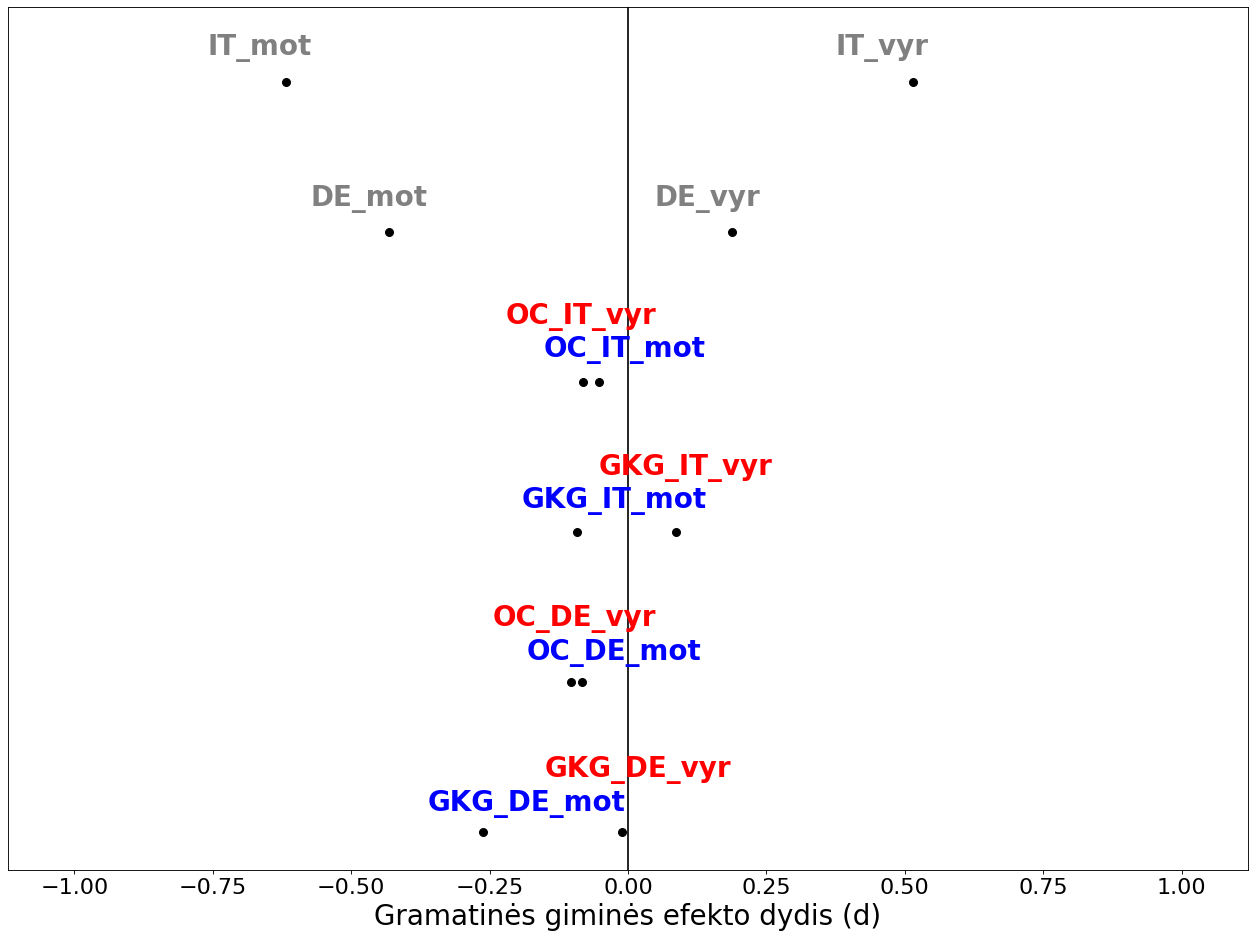

In [42]:
# This is a comparison of several different languages so scores should be handpicked for each language
# In code it's mean(d_list_before), mean(d_list_after)

locale.setlocale(locale.LC_NUMERIC, "de_DE.UTF-8")

# masculine before, feminine before
before_scores = [[0.1886, -0.4314], [0.5148, -0.6174]]
before_groups = [["DE_vyr","DE_mot"], ["IT_vyr","IT_mot"]]

# masculine after, feminine after
after_scores = [[-0.0107, -0.2614], [-0.1036, -0.0829], [0.0875, -0.0917], [-0.0805, -0.0516]]

for scores in after_scores:
    print(round(scores[0] - scores[1], 2))

after_groups = [["GKG_DE_vyr","GKG_DE_mot"],
            ["OC_DE_vyr","OC_DE_mot"],
            ["GKG_IT_vyr","GKG_IT_mot"],
            ["OC_IT_vyr","OC_IT_mot"]]

x_coords = []
y_coords = []
for i in range(6):
    y_coords.append(i)
    y_coords.append(i)
word_labels = []
count = 0

for scores, words in zip(after_scores, after_groups):
    for i in range(2):
        x_coords.append(scores[i])
        word_labels.append(words[i])

for scores, words in zip(before_scores, before_groups):
    for i in range(2):
        x_coords.append(scores[i])
        word_labels.append(words[i])
    
# display scatter plot
fig=plt.figure(figsize=(20, 14), dpi=80)
#ax = plt.subplot(111,aspect = 'equal')
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.scatter(x_coords, y_coords, marker='o',c='k',s=50)

for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
    if k % 12 in [0, 2, 4, 6]:
        color = 'red'
        plt.annotate(label, xy=(x, y), xytext=(x-70, y+50), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
    elif k % 12 in [1, 3, 5, 7]:
        color = 'blue'
        plt.annotate(label, xy=(x, y), xytext=(x-50, y+20), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
        continue
    elif k % 12 in [8, 9, 10, 11]:
        color = 'gray'
        plt.annotate(label, xy=(x, y), xytext=(x-70, y+20), textcoords='offset points', fontsize=25,
                    bbox=dict(pad=5, facecolor="none", edgecolor="none"), color=color, weight='bold')
        continue
  

plt.xlim(-1 - 0.12, 1 + 0.12)
plt.ylim(0 - 0.25, 5 + 0.5)
plt.tick_params(labelsize=20)
plt.xlabel('Gramatinės giminės efekto dydis (d)', fontsize=25)
    
#plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks([])
plt.margins(tight=True)

plt.show()

fig.savefig(f"{BASE_DIR}/results/test/sc-gg.pdf",bbox_inches='tight')

---

In [43]:
html_output_dir = f"{BASE_DIR}/results/test/html"
html_output_file = f"{DEBIAS_ALGORITHM}-{LANGUAGE}"

In [44]:
!jupyter nbconvert --to html test.ipynb --output-dir="$html_output_dir" --output="$html_output_file"

[NbConvertApp] Converting notebook test.ipynb to html
/home/viktorija/.pyenv/versions/3.8.18/lib/python3.8/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 1034781 bytes to /home/viktorija/kursinis/sc-grammatical-gender/results/test/html/gkg-it.html
